### Token-level Labels
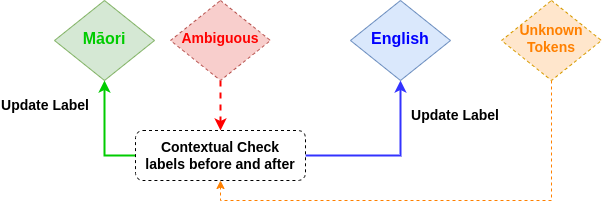

In [1]:
import pandas as pd
from utilities import Convert, remove_punc
from string import punctuation


In [2]:
dfY =pd.read_csv("data/data_after_step1.csv")
dfY.head()

,tweet_id,user_id,modified_text,hashtags,Token-list,Amb_words,Unk_list,Maori_updated,Eng_updated
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],"['apanui', 'apanui']","['te', 'maramataka', 'te', 'wiremu', 'tāwhai',...","['living', 'by', 'the', 'moon', 'a']"
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],['using'],"['ahakoa', 'iti', 'iti', 'pounamu', 'tonu', 'w...","['he', 'he', 'just', 'quietly', 'celebrating',..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[],"['ufb', 'mo', 'valentines']","['mā', 'ka', 'rapu', 'tāne', 'ahau', 'ia', 'rā']",[]
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[],['valley'],"['punga', 'aro']","['our', 'beautiful']"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[],['tommorow'],['maori'],"['television', 'online', 'special', 'of', 'spe..."


In [3]:
### context check for unknown words

NM = []
NE = []
NA = []
NM2 = []
NE2 = []

for ind, row in dfY.iterrows():
    mao = Convert(row['Maori_updated'])
    amb = (row['Unk_list'])
    eng = Convert(row['Eng_updated'])
    tokens = Convert(row['Token-list'])
    tks = Convert(row['Token-list'])
    Nm = []
    Ne = []
    res = []
    Nm2 = []
    Ne2 = []
    i = 0
    j = 0
    if len(amb) !=0:
        am = remove_punc(amb).lower().replace('\'','').strip(punctuation).strip().split()
        while (i < len(tokens)):
            if (am.count(tokens[i]) > 0):
                res.append(i)
            i += 1
        while (j < len(res)):
            if (len(amb) !=0):
                x = res[j]
                S = ['']
                tokensN = S + tokens + S
                try:
                    before = tokensN[x]
                    after = tokensN[x+2]
                    af2 = tokenN[x+3]
                    bf2 = tokenN[x-1]
                    if before in mao:
                        if after in mao:
                            Nm.append(tks[x])
                            am.remove(tokens[x])
                    if before in eng:
                        if after in eng:
                            Ne.append(tks[x])
                            am.remove(tokens[x])
                    if before in '':
                        if after in mao:
                            if af2 in mao:
                                Nm2.append(tks[x])
                                am.remove(tokens[x])
                    if before in mao:
                        if after in '':
                            if bf2 in mao:
                                Nm2.append(tks[x])
                                am.remove(tokens[x])
                    if before in '':
                        if after in eng:
                            if af2 in eng:
                                Ne2.append(tks[x])
                                am.remove(tokens[x])
                    if before in eng:
                        if after in '':
                              if bf2 in eng:
                                    Ne2.append(tks[x])
                                    am.remove(tokens[x])
                except:
                    before = ''
                    after = ''
                j += 1
    NM2.append(Nm2)
    NE2.append(Ne2)
    NM.append(Nm)
    NE.append(Ne)
    NA.append(am)

dfY['New_Add_M'] = NM
dfY['New_Add_E'] = NE
dfY['New_Add_U'] = NA
dfY['New_Add_E_2'] = NE2
dfY['New_Add_M_2'] = NM2

dfY


,tweet_id,user_id,modified_text,hashtags,Token-list,Amb_words,Unk_list,Maori_updated,Eng_updated,New_Add_M,New_Add_E,New_Add_U,New_Add_E_2,New_Add_M_2
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],"['apanui', 'apanui']","['te', 'maramataka', 'te', 'wiremu', 'tāwhai',...","['living', 'by', 'the', 'moon', 'a']",[],[],"[apanui, apanui]",[],[]
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],['using'],"['ahakoa', 'iti', 'iti', 'pounamu', 'tonu', 'w...","['he', 'he', 'just', 'quietly', 'celebrating',...",[],[],[using],[],[]
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[],"['ufb', 'mo', 'valentines']","['mā', 'ka', 'rapu', 'tāne', 'ahau', 'ia', 'rā']",[],[],[],"[ufb, mo, valentines]",[],[]
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[],['valley'],"['punga', 'aro']","['our', 'beautiful']",[],[],[valley],[],[]
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[],['tommorow'],['maori'],"['television', 'online', 'special', 'of', 'spe...",[],[],[tommorow],[],[]
5,1006,x15,<user> <user> too māori for pākehā bt too pāke...,[],"['too', 'māori', 'for', 'pākehā', 'bt', 'too',...",[],"['too', 'too']","['māori', 'pākehā', 'pākehā', 'māori']","['for', 'bt', 'for']",[],[],"[too, too]",[],[]
6,1007,x16,<user> <user> <user> <user> <user> Tomato pure...,[],"['tomato', 'pure', 'i', 'mean']",[],[],[],"['tomato', 'pure', 'i', 'mean']",[],[],[],[],[]
7,1008,x17,<user> really touching story tonite with Hoani...,[],"['really', 'touching', 'story', 'tonite', 'wit...",[],[],"['hoani', 'tino', 'pai']","['really', 'touching', 'story', 'tonite', 'wit...",[],[],[],[],[]
8,1009,x18,Ohhhh he's tooo cute!! Manukura Little White K...,[],"['ohhhh', 'he', 'is', 'tooo', 'cute', 'manukur...",[],"['ohhhh', 'kiwi']",['manukura'],"['he', 'is', 'tooo', 'cute', 'little', 'white']",[],[],"[ohhhh, kiwi]",[],[]
9,1010,x19,smashed those sausage rolls at morning tea. #N...,"['#ngakaipai', '#hangiapopo']","['smashed', 'those', 'sausage', 'rolls', 'at',...",[],['rolls'],[],"['smashed', 'those', 'sausage', 'at', 'morning...",[],[],[rolls],[],[]


In [4]:
N1 = []
N2 = []


for ind, row in dfY.iterrows():
    mao1 = Convert(row['Maori_updated'])
    eng1 = Convert(row['Eng_updated'])
    NM = row['New_Add_M']
    NE = row['New_Add_E']
    NM2 = row['New_Add_M_2']
    NE2 = row['New_Add_E_2']
    NEWM = mao1 + NM2 + NM
    NEWE = eng1 + NE2 + NE
    N1.append(NEWM)
    N2.append(NEWE)

dfY['English_N'] = N2
dfY['new_Maori_N'] = N1

dfY = dfY.drop(['Maori_updated','Eng_updated','New_Add_E', 'New_Add_M', 'New_Add_E_2', 'New_Add_M_2', 'Unk_list'],axis=1)

dfY.head()

,tweet_id,user_id,modified_text,hashtags,Token-list,Amb_words,New_Add_U,English_N,new_Maori_N
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],"[apanui, apanui]","[living, by, the, moon, a]","[te, maramataka, te, wiremu, tāwhai, te, te, n..."
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],[using],"[he, he, just, quietly, celebrating, our, over...","[ahakoa, iti, iti, pounamu, tonu, whanaunga, t..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[],"[ufb, mo, valentines]",[],"[mā, ka, rapu, tāne, ahau, ia, rā]"
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[],[valley],"[our, beautiful]","[punga, aro]"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[],[tommorow],"[television, online, special, of, special]",[maori]


In [6]:
NM = []
NE = []
NA = []

for ind, row in dfY.iterrows():
    mao = row['new_Maori_N']
    amb = str(row['New_Add_U'])
    eng = row['English_N']
    tokens = Convert(row['Token-list'])
    tks = Convert(row['Token-list'])
    Nm = []
    Ne = []
    res = []
    i = 0
    j = 0
    am = remove_punc(amb).lower().replace('\'','').strip(punctuation).strip().split()
    while (i < len(tokens)):
        if (am.count(tokens[i]) > 0):
            res.append(i)
        i += 1
    while (j < len(res)):
        if len(amb) !=0:
            x = res[j]
            try:
                before = tokens[x-1]
                after = tokens[x+1]
                if before in mao:
                    if after in mao:
                        Nm.append(tks[x])
                        am.remove(tokens[x])
                if before in eng:
                    if after in eng:
                        Ne.append(tks[x])
                        am.remove(tokens[x])
            except:
                before = ''
                after = ''
            j += 1
    NM.append(Nm)
    NE.append(Ne)
    NA.append(am)

dfY['New_Add_M'] = NM
dfY['New_Add_E'] = NE
dfY['New_Add_U_U'] = NA
dfY = dfY.drop(['New_Add_U'],axis=1)

In [7]:
N1 = []
N2 = []

for ind, row in dfY.iterrows():
    mao1 = row['new_Maori_N']
    eng1 = row['English_N']
    NM = row['New_Add_M']
    NE = row['New_Add_E']
    NEWM = mao1 + NM
    NEWE = eng1 + NE
    N1.append(NEWM)
    N2.append(NEWE)

dfY['English_Tokens'] = N2
dfY['Maori_Tokens'] = N1

dfY = dfY.drop(['English_N', 'new_Maori_N', 'New_Add_E', 'New_Add_M'],axis = 1)

dfY.head()

,tweet_id,user_id,modified_text,hashtags,Token-list,Amb_words,New_Add_U_U,English_Tokens,Maori_Tokens
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],[],"[living, by, the, moon, a]","[te, maramataka, te, wiremu, tāwhai, te, te, n..."
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],[],"[he, he, just, quietly, celebrating, our, over...","[ahakoa, iti, iti, pounamu, tonu, whanaunga, t..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[],[valentines],[],"[mā, ka, rapu, tāne, ahau, ia, rā, ufb, mo]"
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[],[valley],"[our, beautiful]","[punga, aro]"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[],[tommorow],"[television, online, special, of, special]",[maori]


In [8]:
del NM, NE, NA, N1, N2
del mao, eng, amb, am, mao1, eng1

In [10]:
### context check for ambiguous words

NM = []
NE = []
NA = []
NM2 = []
NE2 = []

for ind, row in dfY.iterrows():
    mao = row['Maori_Tokens']
    amb = row['Amb_words']
    eng = row['English_Tokens']
    tokens = Convert(row['Token-list'])
    tks = Convert(row['Token-list'])
    Nm = []
    Ne = []
    res = []
    Nm2 = []
    Ne2 = []
    i = 0
    j = 0
    if len(amb) !=0:
        am = remove_punc(amb).lower().replace('\'','').strip(punctuation).strip().split()
        while (i < len(tokens)):
            if (am.count(tokens[i]) > 0):
                res.append(i)
            i += 1
        while (j < len(res)):
            if (len(amb) !=0):
                x = res[j]
                S = ['']
                tokensN = S + tokens + S
                try:
                    before = tokensN[x]
                    after = tokensN[x+2]
                    af2 = tokenN[x+3]
                    bf2 = tokenN[x-1]
                    if before in mao:
                        if after in mao:
                            Nm.append(tks[x])
                            am.remove(tokens[x])
                    if before in eng:
                        if after in eng:
                            Ne.append(tks[x])
                            am.remove(tokens[x])
                    if before in '':
                        if after in mao:
                            if af2 in mao:
                                Nm2.append(tks[x])
                                am.remove(tokens[x])
                    if before in mao:
                        if after in '':
                            if bf2 in mao:
                                Nm2.append(tks[x])
                                am.remove(tokens[x])
                    if before in '':
                        if after in eng:
                            if af2 in eng:
                                Ne2.append(tks[x])
                                am.remove(tokens[x])
                    if before in eng:
                        if after in '':
                              if bf2 in eng:
                                    Ne2.append(tks[x])
                                    am.remove(tokens[x])
                except:
                    before = ''
                    after = ''
                j += 1
    NM2.append(Nm2)
    NE2.append(Ne2)
    NM.append(Nm)
    NE.append(Ne)
    NA.append(am)

dfY['New_Add_M'] = NM
dfY['New_Add_E'] = NE
dfY['New_Add_A'] = NA
dfY['New_Add_E_2'] = NE2
dfY['New_Add_M_2'] = NM2

dfY = dfY.drop(['Amb_words'],axis=1)
dfY.head()


,tweet_id,user_id,modified_text,hashtags,Token-list,New_Add_U_U,English_Tokens,Maori_Tokens,New_Add_M,New_Add_E,New_Add_A,New_Add_E_2,New_Add_M_2
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],"[living, by, the, moon, a]","[te, maramataka, te, wiremu, tāwhai, te, te, n...",[],[],[],[],[]
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],"[he, he, just, quietly, celebrating, our, over...","[ahakoa, iti, iti, pounamu, tonu, whanaunga, t...",[],[],[],[],[]
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[valentines],[],"[mā, ka, rapu, tāne, ahau, ia, rā, ufb, mo]",[],[],[],[],[]
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[valley],"[our, beautiful]","[punga, aro]",[],[],[],[],[]
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[tommorow],"[television, online, special, of, special]",[maori],[],[],[],[],[]


In [11]:
N1 = []
N2 = []


for ind, row in dfY.iterrows():
    mao1 = row['Maori_Tokens']
    eng1 = row['English_Tokens']
    NM = row['New_Add_M']
    NE = row['New_Add_E']
    NM2 = row['New_Add_M_2']
    NE2 = row['New_Add_E_2']
    NEWM = mao1 + NM2 + NM
    NEWE = eng1 + NE2 + NE
    N1.append(NEWM)
    N2.append(NEWE)

dfY['English'] = N2
dfY['Maori'] = N1
dfY = dfY.drop(['Maori_Tokens','English_Tokens','New_Add_E', 'New_Add_M', 'New_Add_E_2', 'New_Add_M_2'],axis=1)
dfY.head()

,tweet_id,user_id,modified_text,hashtags,Token-list,New_Add_U_U,New_Add_A,English,Maori
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],[],"[living, by, the, moon, a]","[te, maramataka, te, wiremu, tāwhai, te, te, n..."
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],[],"[he, he, just, quietly, celebrating, our, over...","[ahakoa, iti, iti, pounamu, tonu, whanaunga, t..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[valentines],[],[],"[mā, ka, rapu, tāne, ahau, ia, rā, ufb, mo]"
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[valley],[],"[our, beautiful]","[punga, aro]"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[tommorow],[],"[television, online, special, of, special]",[maori]


In [12]:
NM = []
NE = []
NA = []

for ind, row in dfY.iterrows():
    mao = row['Maori']
    amb = str(row['New_Add_A'])
    eng = row['English']
    tokens = Convert(row['Token-list'])
    tks = Convert(row['Token-list'])
    Nm = []
    Ne = []
    res = []
    i = 0
    j = 0
    am = remove_punc(amb).lower().replace('\'','').strip(punctuation).strip().split()
    while (i < len(tokens)):
        if (am.count(tokens[i]) > 0):
            res.append(i)
        i += 1
    while (j < len(res)):
        if len(amb) !=0:
            x = res[j]
            try:
                before = tokens[x-1]
                after = tokens[x+1]
                if before in mao:
                    if after in mao:
                        Nm.append(tks[x])
                        am.remove(tokens[x])
                if before in eng:
                    if after in eng:
                        Ne.append(tks[x])
                        am.remove(tokens[x])
            except:
                before = ''
                after = ''
            j += 1
    NM.append(Nm)
    NE.append(Ne)
    NA.append(am)

dfY['New_Add_M'] = NM
dfY['New_Add_E'] = NE
dfY['New_Add_A_A'] = NA
dfY = dfY.drop(['New_Add_A'],axis=1)

In [13]:
N1 = []
N2 = []

for ind, row in dfY.iterrows():
    mao1 = row['Maori']
    eng1 = row['English']
    NM = row['New_Add_M']
    NE = row['New_Add_E']
    NEWM = mao1 + NM
    NEWE = eng1 + NE
    N1.append(NEWM)
    N2.append(NEWE)

dfY['English_TokensF'] = N2
dfY['Maori_TokensF'] = N1

dfY = dfY.drop(['English', 'Maori', 'New_Add_E', 'New_Add_M'],axis = 1)

dfY

,tweet_id,user_id,modified_text,hashtags,Token-list,New_Add_U_U,New_Add_A_A,English_TokensF,Maori_TokensF
0,1001,x10,Living by the Moon: Te Maramataka a Te Whānau-...,[],"['living', 'by', 'the', 'moon', 'te', 'maramat...",[],[],"[living, by, the, moon, a]","[te, maramataka, te, wiremu, tāwhai, te, te, n..."
1,1002,x11,"Ahakoa he iti, he iti pounamu tonu! Just quiet...","['#tereo', '#kiatika', '#kiarere', '#kiamāori']","['ahakoa', 'he', 'iti', 'he', 'iti', 'pounamu'...",[],[],"[he, he, just, quietly, celebrating, our, over...","[ahakoa, iti, iti, pounamu, tonu, whanaunga, t..."
2,1003,x12,Mā UFB ka rapu tāne ahau mo ia rā Valentines #...,"['#gigatowngis', '#tweetaz', '#rvbw']","['mā', 'ufb', 'ka', 'rapu', 'tāne', 'ahau', 'm...",[valentines],[],[],"[mā, ka, rapu, tāne, ahau, ia, rā, ufb, mo]"
3,1004,x13,Our beautiful punga @ Aro Valley <link>,[],"['our', 'beautiful', 'punga', 'aro', 'valley']",[valley],[],"[our, beautiful]","[punga, aro]"
4,1005,x14,#TeKaea tommorow Maori Television Online speci...,"['#tekaea', '#ikaroarawhiti']","['tommorow', 'maori', 'television', 'online', ...",[tommorow],[],"[television, online, special, of, special]",[maori]
5,1006,x15,<user> <user> too māori for pākehā bt too pāke...,[],"['too', 'māori', 'for', 'pākehā', 'bt', 'too',...",[too],[],"[for, bt, for]","[māori, pākehā, pākehā, māori, too]"
6,1007,x16,<user> <user> <user> <user> <user> Tomato pure...,[],"['tomato', 'pure', 'i', 'mean']",[],[],"[tomato, pure, i, mean]",[]
7,1008,x17,<user> really touching story tonite with Hoani...,[],"['really', 'touching', 'story', 'tonite', 'wit...",[],[],"[really, touching, story, tonite, with, john]","[hoani, tino, pai]"
8,1009,x18,Ohhhh he's tooo cute!! Manukura Little White K...,[],"['ohhhh', 'he', 'is', 'tooo', 'cute', 'manukur...","[ohhhh, kiwi]",[],"[he, is, tooo, cute, little, white]",[manukura]
9,1010,x19,smashed those sausage rolls at morning tea. #N...,"['#ngakaipai', '#hangiapopo']","['smashed', 'those', 'sausage', 'rolls', 'at',...",[],[],"[smashed, those, sausage, at, morning, tea, ro...",[]


In [14]:
dfY.rename({'New_Add_A_A': 'Ambiguous_list', 'New_Add_U_U': 'Unknown_list'}, axis=1, inplace=True)

In [16]:
###check if tokens match

from collections import Counter

count = 0
c = 0


for ind, row in dfY.iterrows():
    tokens = Convert(row['Token-list'])
    mao = (row['Maori_TokensF'])
    eng = (row['English_TokensF'])
    amb = (row['Ambiguous_list'])
    unk = (row['Unknown_list'])
    allT = mao + eng + amb + unk
    first = list((Counter(tokens)-Counter(allT)).elements())
    if len(first) !=0:
        count = count + 1
   
    second = list((Counter(allT)-Counter(tokens)).elements())
    if len(second) !=0:
        c = c + 1

print(count)
print(c)



0
0


In [17]:
dfY.to_csv("data/data_token_labels.csv",index=False)
